# Лабораторная работа №4

# Фундаментальные концепции искусственного интеллекта

Студент **Морозов Артем Борисович**

Группа **М8О-109СВ-24**

4. Восстановление функции распренделения вероятности
     1. Реализовать метод восстановления плотности вероятности двумя способами:
        1. EM-алгоритм
        2. Ядерное сглаживание
     2. Применить данные методы на любом наборе случайных точек
     3. Реализовать метод Метрополиса-Гастингса и Гибсона для несимметричного распределения. Применить два метода на основе той функции плотности, которая была восстановлена в прошлом пункте, тем самым получив изначальные точки.
     4. Сравнить красный и синий набор точек (сгенерированые и исходные) (с помощью Расстояния Кульбака-Лейблера)

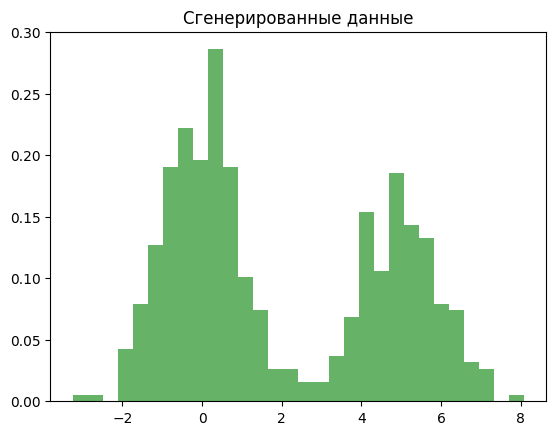

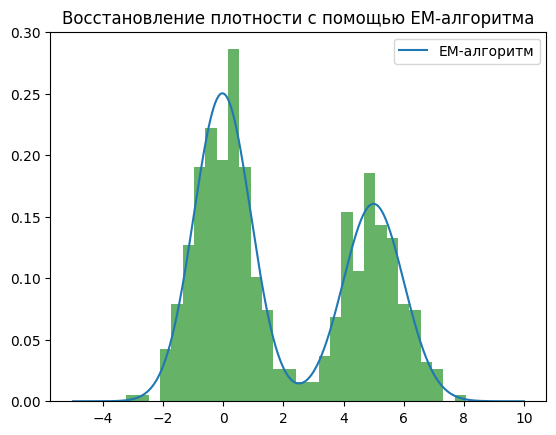

In [1]:
# Реализация ЕМ-алгоритма
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

np.random.seed(42)
data = np.concatenate([np.random.normal(0, 1, 300), np.random.normal(5, 1, 200)])

plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.title('Сгенерированные данные')
plt.show()

# Реализация EM-алгоритма с использованием GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(data.reshape(-1, 1))

# плотность вероятности, восстановленную алгоритмом EM
x = np.linspace(-5, 10, 1000)
pdf = np.exp(gmm.score_samples(x.reshape(-1, 1)))

plt.plot(x, pdf, label="EM-алгоритм")
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.title('Восстановление плотности с помощью EM-алгоритма')
plt.legend()
plt.show()

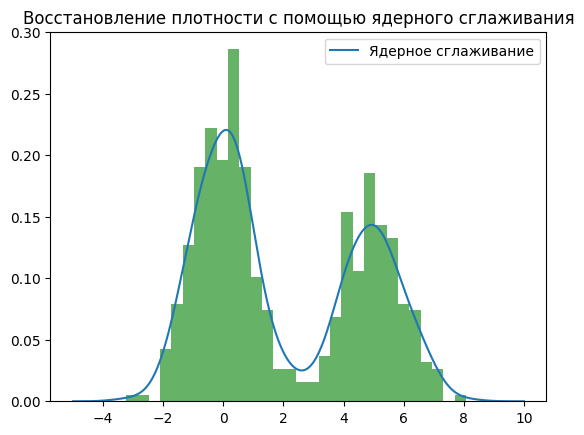

In [2]:
from sklearn.neighbors import KernelDensity

# Реализация ядерного сглаживания
kde = KernelDensity(kernel='gaussian', bandwidth=0.5)
kde.fit(data.reshape(-1, 1))

# плотность вероятности, восстановленную с помощью KDE
pdf_kde = np.exp(kde.score_samples(x.reshape(-1, 1)))

plt.plot(x, pdf_kde, label="Ядерное сглаживание")
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.title('Восстановление плотности с помощью ядерного сглаживания')
plt.legend()
plt.show()

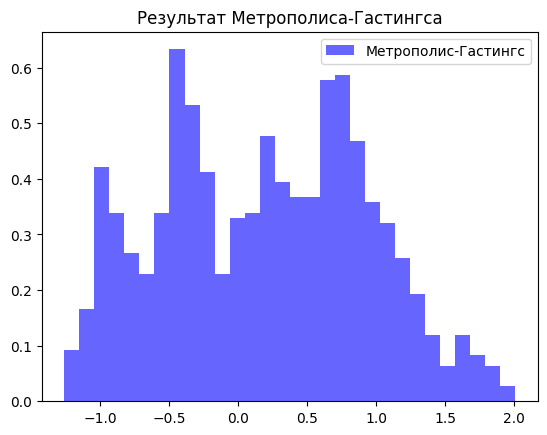

In [ ]:
# Метод Метрополиса - Гастингса
def metropolis_hastings(p, proposal, n_samples, start):
    samples = []
    current = start
    for _ in range(n_samples):
        proposed = proposal(current)
        acceptance_ratio = p(proposed) / p(current)
        if np.random.rand() < acceptance_ratio:
            current = proposed
        samples.append(current)
    return np.array(samples)

# Функция плотности
def target_density(x):
    return np.exp(-0.5 * (x ** 2))  # Стандартное нормальное распределение

def proposal_distribution(x):
    return x + np.random.normal(0, 0.1)

samples_metropolis = metropolis_hastings(target_density, proposal_distribution, 1000, start=0)

plt.hist(samples_metropolis, bins=30, density=True, alpha=0.6, color='b', label="Метрополис-Гастингс")
plt.title('Результат Метрополиса-Гастингса')
plt.legend()
plt.show()

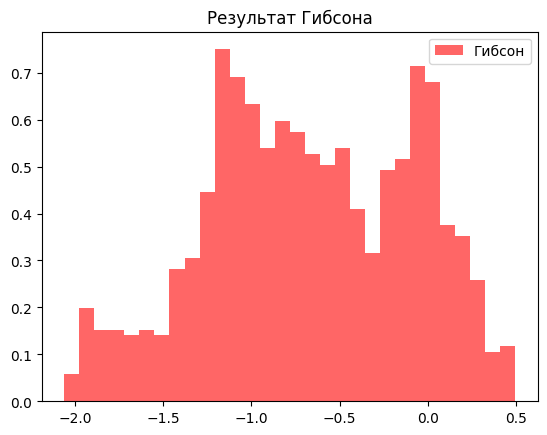

In [ ]:
# Метод Гибсона
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def gibbs_sampler(p, proposal, n_samples, start):
    samples = [start]
    current = start
    for _ in range(n_samples - 1):
        proposed = proposal(current)
        acceptance_ratio = p(proposed) / p(current)
        if np.random.rand() < acceptance_ratio:
            current = proposed
        samples.append(current)
    return np.array(samples)

def target_density(x):
    return np.exp(-0.5 * (x ** 2))  # Стандартное нормальное распределение

def proposal_distribution(x):
    return x + np.random.normal(0, 0.1)

samples_gibbs = gibbs_sampler(target_density, proposal_distribution, 1000, start=0)

plt.hist(samples_gibbs, bins=30, density=True, alpha=0.6, color='r', label="Гибсон")
plt.title('Результат Гибсона')
plt.legend()
plt.show()

In [10]:
from scipy.special import kl_div
# Сравниваем распределения с использованием расстояния Кульбака-Лейблера
def kl_divergence(p, q):
    return np.sum(kl_div(p, q))

hist_data, bin_edges = np.histogram(data, bins=30, density=True)
hist_metropolis, _ = np.histogram(samples_metropolis, bins=30, density=True)
hist_gibbs, _ = np.histogram(samples_gibbs, bins=30, density=True)

kl_metropolis = kl_divergence(hist_data, hist_metropolis)
kl_gibbs = kl_divergence(hist_data, hist_gibbs)

print(f"KL-расстояние для Метрополиса-Гастингса: {kl_metropolis}")
print(f"KL-расстояние для Гибсона: {kl_gibbs}")

KL-расстояние для Метрополиса-Гастингса: 4.1862959258493735
KL-расстояние для Гибсона: 6.2807251411943055
